In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 단순회귀분석 

Step1 - 데이터 준비

In [2]:
df = pd.read_csv('auto-mpg.csv', header=0)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin', 'name']
print(df.head())
print('\n')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0  

Step 2 - 데이터 탐색

In [3]:
print(df.info())
print('\n')
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# horsepower 가 문자열(object) 에서 숫자형으로 변경한다.
print(df['horsepower'].unique()) # 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True) # ?을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')  # 문자열을 실수형으로 변환

print(df.describe())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000

Step 3 - 속성 선택

단순회귀분석에 변수로 사용할 후보 열을 선택한다. 예측 목표인 종속변수가(Y)가 될 'mpg' 열과 독립 변수(X)로 사용할 후보로 3개의 열('cylinders', 'horsepower', 'weight')을 포함한다.

일대일 관계를 찾는 것이므로 두 변수 간에 선형관계가 있는지 그래프를 그려서 확인한다.

In [5]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0    3504
1  15.0          8       165.0    3693
2  18.0          8       150.0    3436
3  16.0          8       150.0    3433
4  17.0          8       140.0    3449


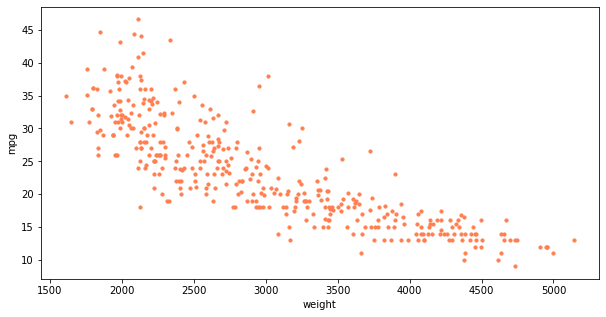

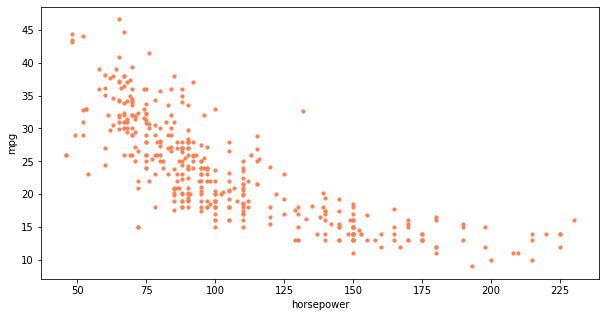

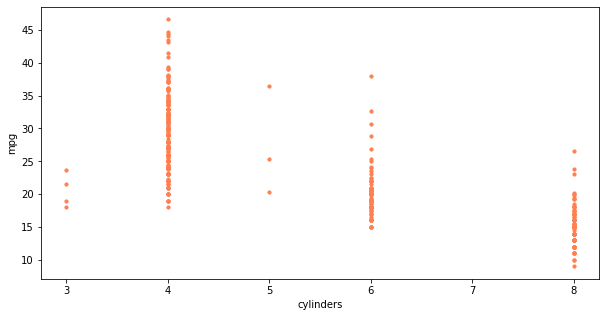

In [6]:
# matplotlib으로 그래프 그리기
# 종속 변수 Y인 "연비(mpg)" 와 다른 변수 간의 선형관계를 그래프(산점도)로 확인

ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
ndf.plot(kind='scatter', x='horsepower', y='mpg', c='coral', s=10, figsize=(10,5))
ndf.plot(kind='scatter', x='cylinders', y='mpg', c='coral', s=10, figsize=(10,5))

# cylinders는 선형관계가 보여 지지 않는다.

plt.show()
plt.close()

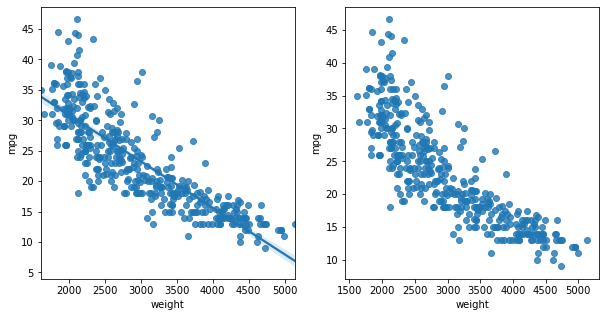

In [7]:
# Seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 그래프(산점도) 그리기.

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)  # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg = False) # 회귀선 표시 안함

plt.show()
plt.close()

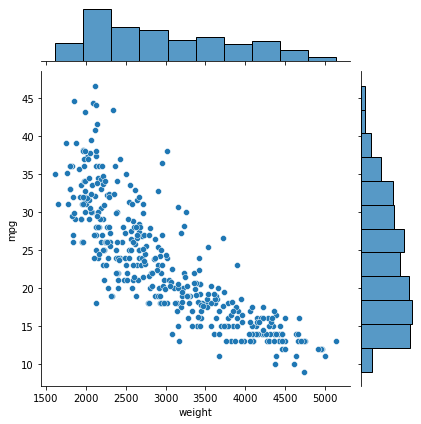

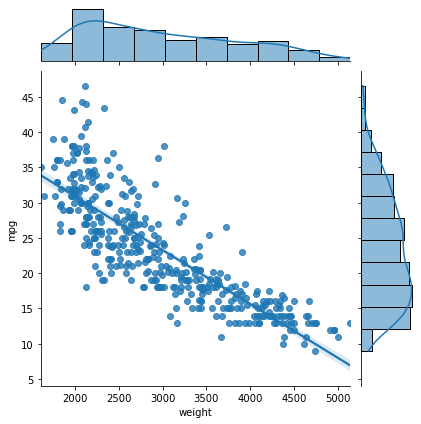

In [8]:
# Seaborn 라이브러리의 jointplot() 함수를 이용하여 두 변수에 대한 그래프(산점도) 그리기.
# 두 변수의 히스토그램이 x,y 축에 별도로 표시되는 특징이 있다. kind = 'reg' 옵션을 사용하면 회귀선을 표시한다.

sns.jointplot(x='weight', y='mpg', data=ndf)        # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시

plt.show()
plt.close()

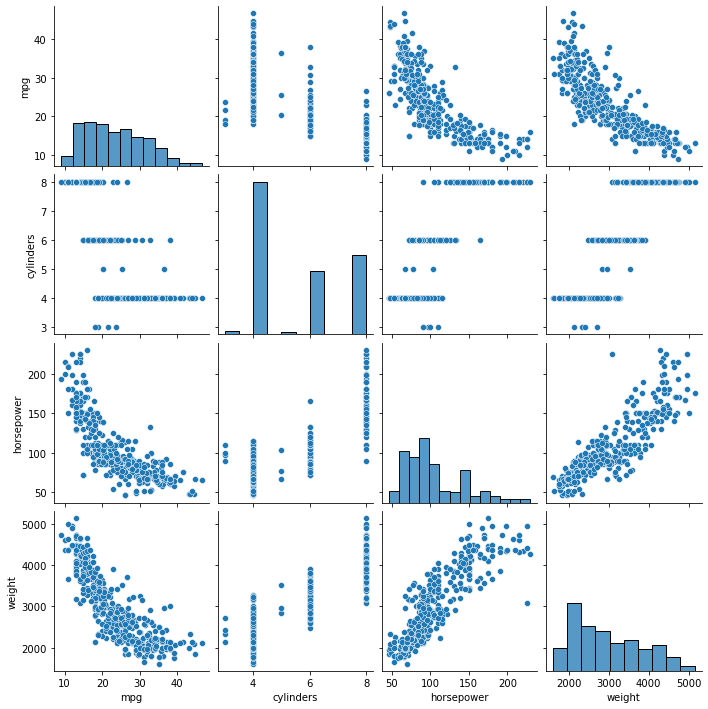

In [9]:
# Seaborn 라이브러리의  pairplot() 함수를 사용하여 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 경우의 수에 대하여 두 변수 간의 산점도를 그린다.
# 앞에서는 각 변수에 대하여 하나씩 그래프를 그리는 것이지만, pairplot() 함수를 사용하면 한번에 모든 경우의 수에 대하여 그래프로 나타낼 수 있다.
# seaborn pariplot 으로 두 변수 간의 모든 경우의 수 그리기
# 컬럼으로 설정한 독립변수와 종속변수간의 모든 경우의 수를 그래프를 표시
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

Steop 4 - 훈련/검증 데이터 분할

'mpg' 열과 선형관계를 보이는 'horsepower' 열과 'weight'열을 독립 변수로 X로 선택하는 것을 고려한다.

다음은 두 변수 간의 회귀방정식을 찾을 차례이다.

훈련 데이터와 검증 데이터로 나눠서 모형을 구축한다.

예제는 'weight' 열을 독립 변수 X로 선택하고 데이터를 7:3의 비율로 분할한다. 훈련 데이터 274개, 검증 데이터 118개로 나뉜다.

In [10]:
X=ndf[['weight']] # 독립 변수 X
y=ndf[['mpg']]    # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,            # 독립 변수
                                                   y,             # 종속 변수
                                                   test_size=0.3,  # 검증 30%
                                                   random_state=10 # 랜덤 추출 값
                                                   )

print('train data 개수 : ', len(X_train))
print('testdata 개수 : ', len(X_test))

train data 개수 :  274
testdata 개수 :  118


Step 5 - 모형 학습 및 검증

sklearn 라이브러리에서 선형회귀분석 모듈을 사용한다. LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 lr에 저장한다.

모형 객체(lr)에 fit() 메소드를 적용하고 훈련데이터(X_train, y_train)를 전달하면 모형이 학습을 통해 회귀 방정식의 계숙 a,b를 찾는다.

학습을 마친 모형의 예측 능력을 평가하기 위해 검증 데이터를 score() 메소드에 전달하여 lr모형의 결정계속(R-제곱)를 구한다. 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단한다.

In [11]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀 분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계숙(R-제곱) 계산
r_square = lr.score(X_test, y_test)

print(r_square)

0.6822458558299325


회귀선의 관계식 즉, 회귀방정식을 구성하는 계숙 a,b를 확인할 수 있다. 계수 a는 회귀식의 기울기를 나타내고, 

모형 객체 lr의 coef_ 속성값이다. 계수 b는 y 절편이고, 모형 객체 lr의 intercept_ 속성값이다. 

본 예제에서 a는 -0.00775이고, b는 46.7103 이다.

In [12]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)

기울기 a:  [[-0.00775343]]


y절편 b [46.71036626]


모형이 예측한 결과와 실제 값을 비교해 본다. 독립 변수 전체 데이터(X)를 predict() 메소드에 입력하여 모형이 반환하는 예측값을 y_hat에 저장한다. 실제 값 y와 모형의 예측값 y_hat을 같은 화면에 분포도를 그려서 비교한다.

Seaborn 라이브러리의 distplot() 함수를 사용한다.

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


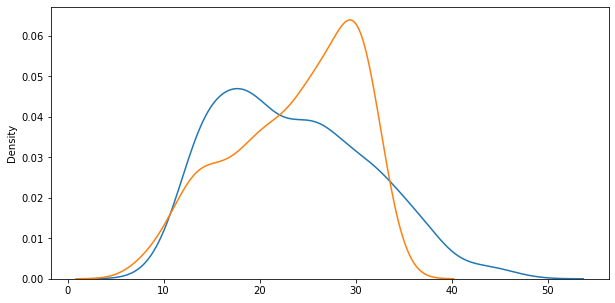

In [14]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 따라서 독립 변수(weight)와 종속 변수(mpg)사이에 